### HMMs using Kalman filter in Stan. 

* Code from https://jrnold.github.io/ssmodels-in-stan/the-linear-state-space-model.html

### Notation: 

### Model

* $Y_t$ observation, $X_t$ latent factor.

* 
\begin{align*}
Y_t 
& =
Z X_t + w_t, \quad w_t \sim N_3 \left (0, H) \right ),
\\
X_t 
& =
T X_{t-1} + v_t, \quad v_t \sim N(0, I).
\end{align*}

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, numpy.random as npr, pystan as ps, pickle, pandas
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange

In [2]:
sm = ps.StanModel(file="HMM-no_covariates.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f264dfaf109577617e07f5a8623b237c NOW.


#### Load data from file and define dimensions etc:

In [3]:
y = pandas.read_csv("/xtmp/DC-BATS_data/ozone_data/detrend_data.csv").values

n = np.shape(y)[0]             # length of time series 
p = np.shape(y)[1]             # dimension of observations
m = 1                          # dimension of latent states

### Plot data to visualize them:

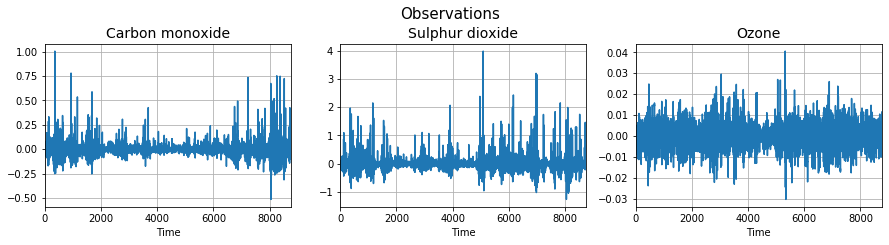

In [4]:
titles = ["Carbon monoxide", "Sulphur dioxide", "Ozone"]
plt.rcParams['figure.figsize'] = (15, 3)
for i in range(3) :
    plt.subplot(1,3,i+1)
    plt.plot(y[:,i])
    plt.grid(True)
    plt.xlabel("Time")
    plt.title(titles[i], fontsize=14)
    plt.xlim(0,n)
plt.suptitle("Observations", y=1.05, fontsize=15);

### Divide-and-conquer:

In [5]:
K = 10
tstarts = np.arange(K).astype(int)
tends = 1 + tstarts
tstarts *= int(n/K)
tends *= int(n/K)

In [ ]:
n_chains = 10
for i in range(K) :
    tstart, tend = tstarts[i], tends[i]
    data = dict(n=tend-tstart, m=m, p=p, y=y[tstart:tend], power=K)
    fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1_000)
    file = open("/xtmp/DC-BATS_data/ozone_data/mcmc_no_covariate_chunk"+str(i+1)+".pkl", "wb")
    pickle.dump(fit.extract(), file)
    file.close()

In [ ]:
n_chains = 10
i = K-1
tstart, tend = tstarts[i], tends[i]
data = dict(n=tend-tstart, m=m, p=p, y=y[tstart:tend], power=K)
fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1_000)
file = open("/xtmp/DC-BATS_data/ozone_data/mcmc_no_covariate_chunk"+str(i+1)+".pkl", "wb")
pickle.dump(fit.extract(), file)
file.close()